LINEAR REGRESSION ERRORS:
Training error: 0.004853811672561506
Validation error: 0.01623489848980069
Test error: 0.011421689771912465
Regression score: 0.6718445028180913

RANDOM FOREST REGRESSOR ERRORS:
Training error: 0.0010108675443699208
Validation error: 0.018148983923121774
Test error: 0.013829470919573619
Regression score: 0.6026667685778386


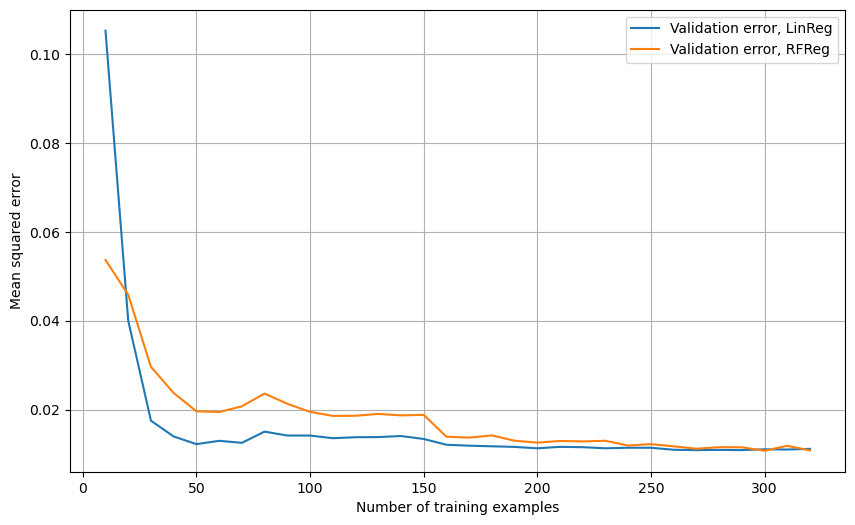

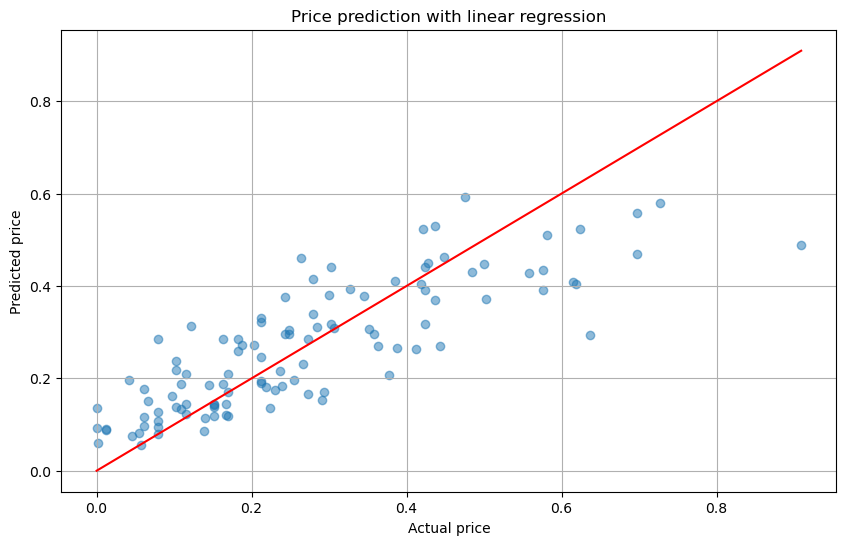

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# importing and reading the csv file
data = pd.read_csv('Housing.csv')

# changing values 'yes'/'no' to represent '1'/'0'.
change_value = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[change_value] = data[change_value].applymap(lambda x: 1 if x == 'yes' else 0)

# changing values of the 'furnishingstatus' column to 0 or 1 or 2
data['furnishingstatus'] = data['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# setting price as the label and rest of the attributes as features
y = np.asarray(data[['price']])
X = np.asarray(data[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']])

# scaling the features and label
minmax = MinMaxScaler()
X1 = minmax.fit_transform(X)
y1 = minmax.fit_transform(y)

# split data into training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(X1, y1, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# defining the models
regr = LinearRegression()       #model 1
rf = RandomForestRegressor()    #model 2

#Errors for the Linear regression model
training_errors1 = []
validation_errors1 = []

#Errors for the Random forest regressor
training_errors2 = []
validation_errors2 = []

#Training the models
subset = range(10, len(X_train) + 1, 10)

for i in subset:
    #LINEAR REGRESSION
    regr.fit(X_train[:i], y_train[:i])
    
    # Training error
    y_train_pred1 = regr.predict(X_train[:i])
    tr_error1 = mean_squared_error(y_train[:i], y_train_pred1)
    training_errors1.append(tr_error1)

    # Validation error
    y_val_pred1 = regr.predict(X_val[:i])
    val_error1 = mean_squared_error(y_val[:i], y_val_pred1)
    validation_errors1.append(val_error1)
    
    #RANDOM FOREST REGRESSOR
    rf.fit(X_train[:i], y_train[:i].ravel())
    
    # Training error
    y_train_pred2 = rf.predict(X_train[:i])
    tr_error2 = mean_squared_error(y_train[:i], y_train_pred2)
    training_errors2.append(tr_error2)
    
    # Validation error
    y_val_pred2 = rf.predict(X_val[:i])
    val_error2 = mean_squared_error(y_val[:i], y_val_pred2)
    validation_errors2.append(val_error2)

# Final linear regression model on the full training set
regr.fit(X_train, y_train)
y_test_pred1 = regr.predict(X_test)
test_error1 = mean_squared_error(y_test, y_test_pred1)
r21 = r2_score(y_test, y_test_pred1)

# Final random forest model on the full training set
rf.fit(X_train, y_train.ravel())
y_test_pred2 = rf.predict(X_test)
test_error2 = mean_squared_error(y_test, y_test_pred2)
r22 = r2_score(y_test, y_test_pred2)


print('LINEAR REGRESSION ERRORS:')
print('Training error:', np.mean(training_errors1))
print('Validation error:', np.mean(validation_errors1))
print('Test error:', test_error1)
print('Regression score:', r21)
print('')
print('RANDOM FOREST REGRESSOR ERRORS:')
print('Training error:', np.mean(training_errors2))
print('Validation error:', np.mean(validation_errors2))
print('Test error:', test_error2)
print('Regression score:', r22)

#plotting
#plt.figure(figsize=(10, 6))
#plt.plot(subset, validation_errors1, linestyle='-', label='Validation error, LinReg')
#plt.plot(subset, validation_errors2, linestyle='-', label='Validation error, RFReg')
#plt.title('')
#plt.xlabel('Number of training examples')
#plt.ylabel('Mean squared error')
#plt.legend()
#plt.grid(True)

# Scatter plot of actual vs. predicted price
#plt.figure(figsize=(10, 6))
#plt.scatter(y_test, y_test_pred1, alpha=0.5)
#plt.title('Price prediction with linear regression')
#plt.xlabel('Actual price')
#plt.ylabel('Predicted price')
#plt.grid(True)

#regression_line_x = np.linspace(min(y_test), max(y_test), 100)
#regression_line_y = regression_line_x  
#plt.plot(regression_line_x, regression_line_y, color='r')

#plt.show()